# License Plate Recognition
License Plate Recognition Algorithm

1. License Plate Detection:
    - Contour detection
    - Haar Cascade
2. Character Segmentation:
3. Character Recognition:
    -  OCR (Optical Character Recognition) with Pytesseract

In [89]:
import cv2
import imutils
import numpy as np
import pytesseract

from PIL import Image
from pytesseract import Output
import requests
from IPython.display import display

In [90]:
pytesseract.pytesseract.tesseract_cmd = r'D:\Program Files\Tesseract-OCR\tesseract.exe'

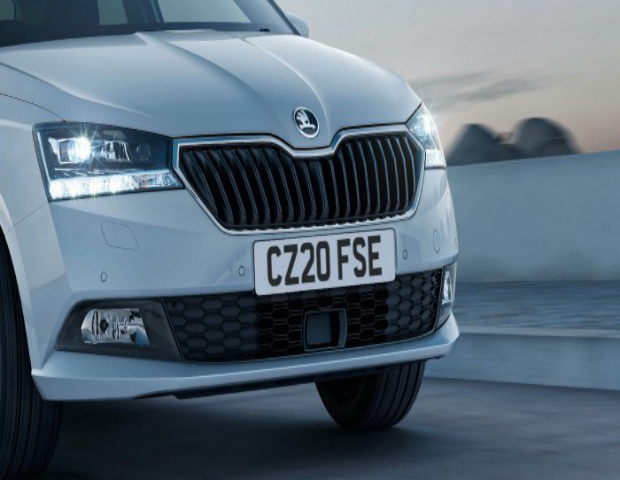

In [228]:
img = cv2.imread('license-plate/Plate10.jpg',cv2.IMREAD_COLOR)
img = cv2.resize(img, (620,480) )
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(Image.fromarray(rgb_img))

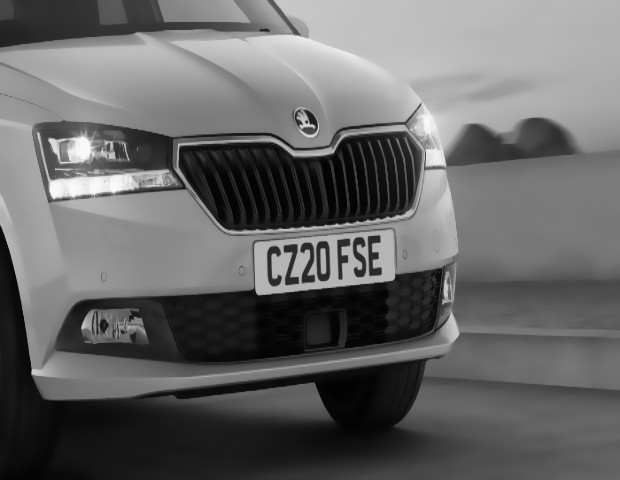

In [229]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
# bilateral filter (Blurring) will remove the unwanted details from an image
# destination_image = cv2.bilateralFilter(source_image, diameter of pixel, sigmaColor, sigmaSpace)
gray = cv2.bilateralFilter(gray, 13, 15, 15) 
display(Image.fromarray(gray))

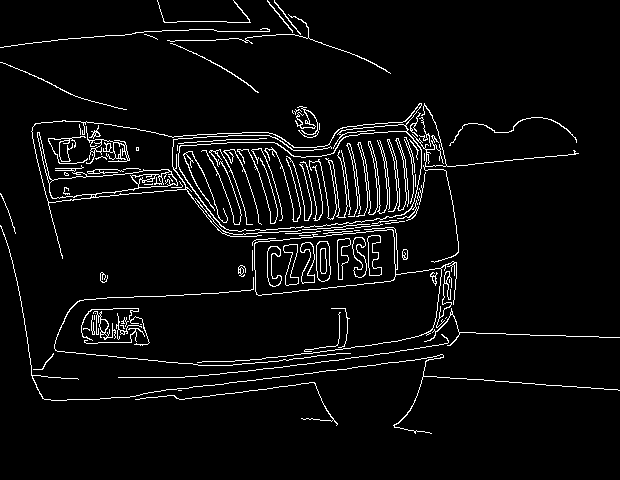

In [230]:
# edge detection
edged = cv2.Canny(gray, 30, 200) 
display(Image.fromarray(edged))

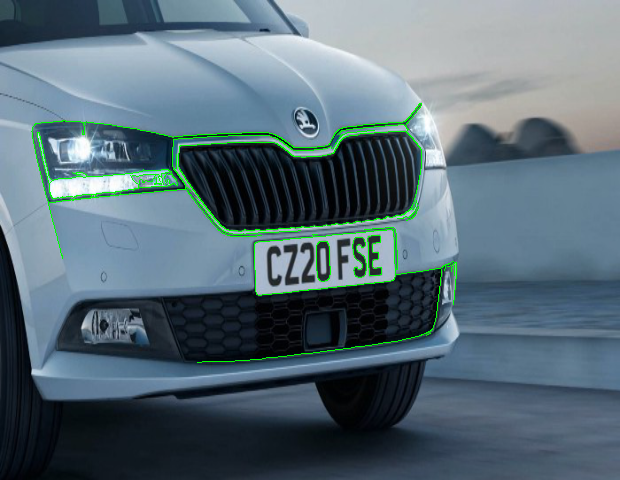

10
7
12
4


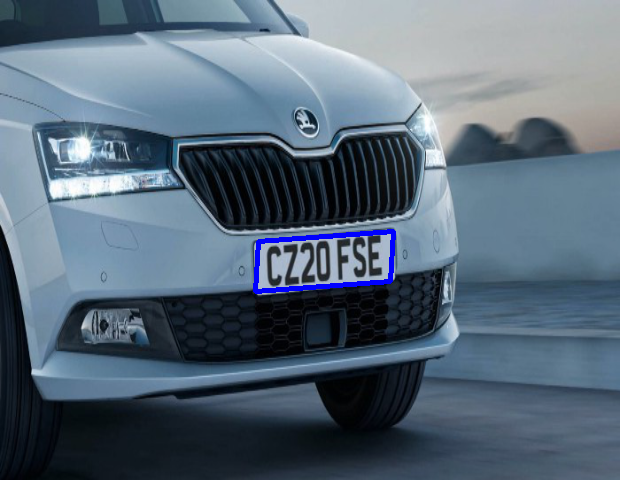

7
9
7
16
13
13


In [231]:
# contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None

img = rgb_img.copy()
cv2.drawContours(img, contours, -1, (0,255,0), 1)
display(Image.fromarray(img))

screenCnt = None
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    print(len(approx))
    img = rgb_img.copy()
    if len(approx) == 4:
        screenCnt = approx
        cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)
        display(Image.fromarray(img))

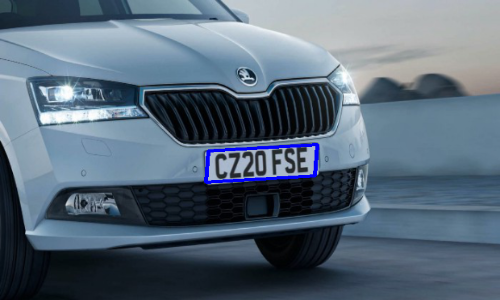

In [232]:
if screenCnt is None:
    print ("No contour detected")
else:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)
    img_resize = cv2.resize(img,(500,300))
    display(Image.fromarray(img_resize))
    

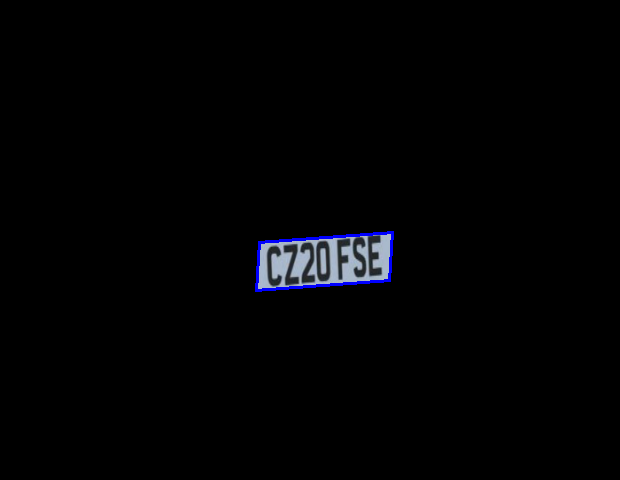

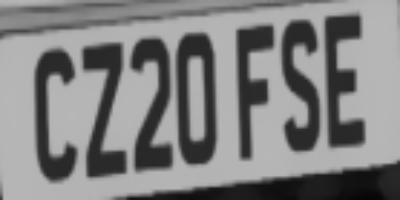

In [233]:
if screenCnt is None:
    print ("No contour detected")
else:
    mask = np.zeros(gray.shape,np.uint8) # character segmentation
    new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv2.bitwise_and(img,img,mask=mask)
    display(Image.fromarray(new_image))
    
    
    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    cropped = gray[topx:bottomx+1, topy:bottomy+1]

    

    cropped_resize = cv2.resize(cropped,(400,200))
    display(Image.fromarray(cropped_resize))

In [198]:
if screenCnt is None:
    print ("No contour detected")
else:
    text = pytesseract.image_to_string(cropped, config='--psm 11')
    print("Detected license plate Number is:",text)

Detected license plate Number is: 


## Car Plate Detection with OpenCV and Haar Cascade feature set

In [199]:
import os.path
from os import path

if not path.exists("haarcascade_russian_plate_number.xml"):
    url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml"
    response = requests.get(url)
    with open("haarcascade_russian_plate_number.xml", "wb") as f:
        f.write(response.content)
carplate_haar_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

214 299 156 52


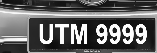

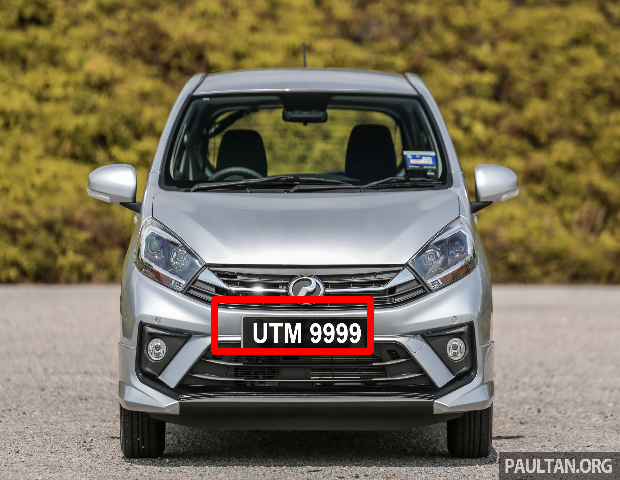

In [213]:
# Setup function to detect car plate

carplate_overlay = rgb_img.copy() 
carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=3)
for x,y,w,h in carplate_rects: 
    print(x,y,w,h)
    cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
    cropped = gray[y:y+h+1, x:x+w+1]
    display(Image.fromarray(cropped))

detected_carplate_img = carplate_overlay

display(Image.fromarray(detected_carplate_img))

In [227]:
text = pytesseract.image_to_string(cropped, config='--psm 4 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print("Detected license plate Number is:",text)

Detected license plate Number is: UTM9999

